# PART 3 :  N Step Double QLearning (n=4) by minazmeh and nagasita

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from collections import deque

Initial State:


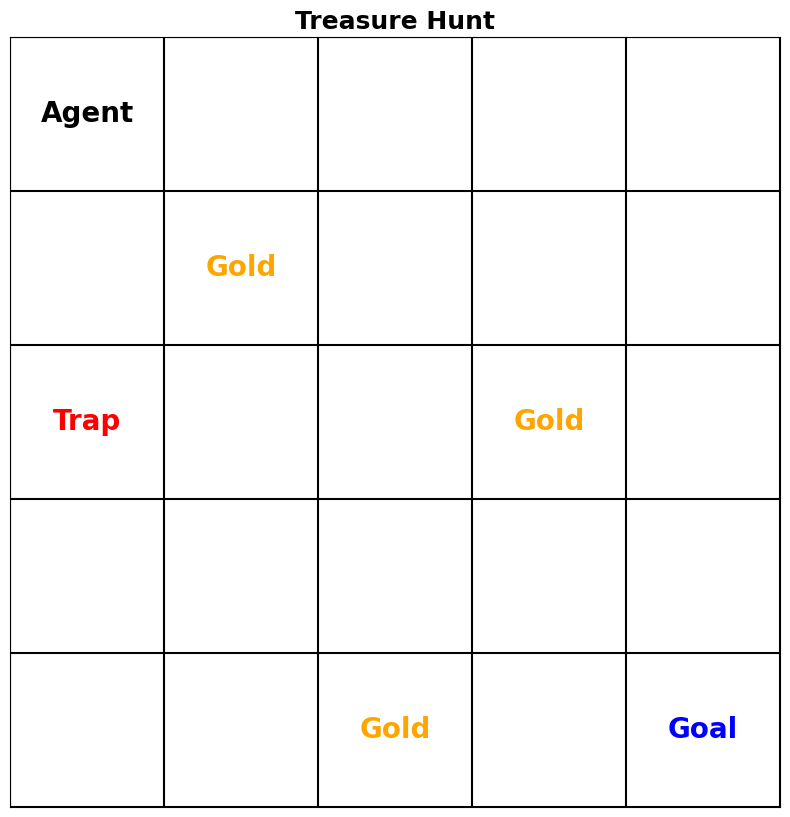

In [2]:
class TreasureHuntEnv:
    def __init__(self):
        self.action_space = ['Up', 'Down', 'Left', 'Right']
        self.state_space = [(x, y) for x in range(5) for y in range(5)]
        self.rewards = {
            (1, 1): 1,
            (4, 2): 3,
            (2, 3): 1,
            (2, 0): -1,
            (4, 4): 50 
        }
        self.current_state = (0, 0)

    def step(self, action): 
        x, y = self.current_state
        if action == 'Up':
            x = max(0, x - 1)
        elif action == 'Down':
            x = min(4, x + 1)
        elif action == 'Left':
            y = max(0, y - 1)
        elif action == 'Right':
            y = min(4, y + 1)

        self.current_state = (x, y)
        reward = self.rewards.get(self.current_state, 0)
        done = self.current_state == (4, 4)
        return self.current_state, reward, done

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state
    
    def render(self):
        grid = np.zeros((5, 5)) 
        x, y = self.current_state 

        plt.figure(figsize=(10, 10))  
        for i in range(5):
            for j in range(5):
                if (i, j) == (4, 4):  
                    if (i, j) == self.current_state:
                        continue
                    plt.text(j + 0.5, 4 - i + 0.5, "Goal", ha='center', va='center',
                             color="blue", fontsize=20, fontweight='bold')
                    
                elif (i, j) in self.rewards:
                    if (i, j) == self.current_state: 
                        continue
                    if self.rewards[(i, j)] > 0:
                        plt.text(j + 0.5, 4 - i + 0.5, "Gold", ha='center', va='center',
                                 color="orange", fontsize=20, fontweight='bold')
                    elif self.rewards[(i, j)] < 0:
                        plt.text(j + 0.5, 4 - i + 0.5, "Trap", ha='center', va='center',
                                 color="red", fontsize=20, fontweight='bold')

        if self.current_state in self.rewards:
            if self.rewards[self.current_state] == 50:  
                agent_color = "blue"
                cell_color = "black"  
            elif self.rewards[self.current_state] > 0:  
                agent_color = "orange"
                cell_color = "black"  
            elif self.rewards[self.current_state] < 0:  
                agent_color = "red"
                cell_color = "black"
        else:
            agent_color = "black"  
            cell_color = None
        if cell_color:
            plt.gca().add_patch(plt.Rectangle((y, 4 - x), 1, 1, color=cell_color))

        plt.text(y + 0.5, 4 - x + 0.5, "Agent", ha='center', va='center',
                 color=agent_color, fontsize=20, fontweight='bold')

        for i in range(6):
            plt.axhline(i, color='black', linewidth=1.5)
            plt.axvline(i, color='black', linewidth=1.5)

        plt.xlim(0, 5)
        plt.ylim(0, 5)

        plt.gca().set_aspect('equal', adjustable='box') 
        plt.gca().set_xticks([]) 
        plt.gca().set_yticks([])
        plt.title("Treasure Hunt", fontsize=18, fontweight='bold')
        plt.show()

env = TreasureHuntEnv()
state = env.reset()
print("Initial State:")
env.render()

In [3]:
class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99,min_epsilon=0.01):
        self.env = env
        self.alpha = alpha 
        self.gamma = gamma 
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.Q = {state: {action: 0 for action in env.action_space} for state in env.state_space}
        print("Initial Q-values:")
        for state in self.Q:
            print(f"State {state}: {self.Q[state]}")
    def epsilon_greedy_policy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            return max(self.Q[state], key=self.Q[state].get)

    def train(self, episodes):
        rewards_per_episode = []
        epsilon_values = []

        for episode in range(episodes):
            state = self.env.reset()
            action = self.epsilon_greedy_policy(state)
            total_reward = 0

            while True:
                next_state, reward, done = self.env.step(action)
                next_action = self.epsilon_greedy_policy(next_state)

                self.Q[state][action] += self.alpha * (
                    reward + self.gamma * self.Q[next_state][next_action] - self.Q[state][action]
                )

                total_reward += reward
                state, action = next_state, next_action

                if done:
                    break

            rewards_per_episode.append(total_reward)
            epsilon_values.append(self.epsilon)
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, epsilon_values

    def evaluate(self, episodes, max_steps=100):
        print('Start evaluation')
        rewards = []
        comments = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            success = False
            steps = 0

            while steps < max_steps:
                steps += 1
                action = max(self.Q[state], key=self.Q[state].get)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                state = next_state

                if done:
                    success = True
                    break

            rewards.append(total_reward)
            if success:
                comments.append(f"Episode {episode + 1}: SUCCESS - Goal reached in {steps} steps with total reward {total_reward}.")
            else:
                comments.append(f"Episode {episode + 1}: FAIL - Goal not reached in {steps} steps (max steps reached).")

        for comment in comments:
            print(comment)

        return rewards, comments

env = TreasureHuntEnv()
agent = SARSAAgent(env, alpha=0.8, gamma=0.7, epsilon=1, epsilon_decay=0.99,min_epsilon=0.2)

episodes = 1000
rewards_per_episode_sars, epsilon_values_sars = agent.train(episodes)

Initial Q-values:
State (0, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (3, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (3, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right':

In [4]:
evaluation_episodes = 40
evaluation_rewards_sars, evaluation_comments = agent.evaluate(evaluation_episodes, max_steps=1000)

Start evaluation
Episode 1: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 2: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 3: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 4: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 5: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 6: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 7: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 8: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 9: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 10: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 11: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 12: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 13: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 14: SUCCESS - Goal reached in 8 steps with total reward 52.
Episode 15: SUCCESS - Goal reached in 8 

Trained Q-table:
(0, 0): {'Up': 2.845543663528028, 'Down': 1.9980418526089248, 'Left': 3.151685319842411, 'Right': 3.2801848514628973}
(0, 1): {'Up': 2.3694333532300225, 'Down': 5.876037758686658, 'Left': 2.5677174814188986, 'Right': 2.6646310316273882}
(0, 2): {'Up': 3.5290060991073604, 'Down': 7.524543264338872, 'Left': 2.742844646383271, 'Right': 3.3182980058316898}
(0, 3): {'Up': 3.6721447847480175, 'Down': 4.225640768662441, 'Left': 3.1856671635036617, 'Right': 3.505797473739035}
(0, 4): {'Up': 3.1720531780112338, 'Down': 11.12453533757091, 'Left': 4.054409053434359, 'Right': 3.1998190740390053}
(1, 0): {'Up': 2.2372190840826662, 'Down': 1.4128240827251355, 'Left': 3.0181631475803385, 'Right': 5.999714420607087}
(1, 1): {'Up': 2.5659747400555672, 'Down': 8.356350573528884, 'Left': 0.9279182540275754, 'Right': 3.2405664180932474}
(1, 2): {'Up': 2.0112252850431274, 'Down': 11.284713271392814, 'Left': 3.443665899795191, 'Right': 9.986385169795216}
(1, 3): {'Up': 3.267946484736433, 'D

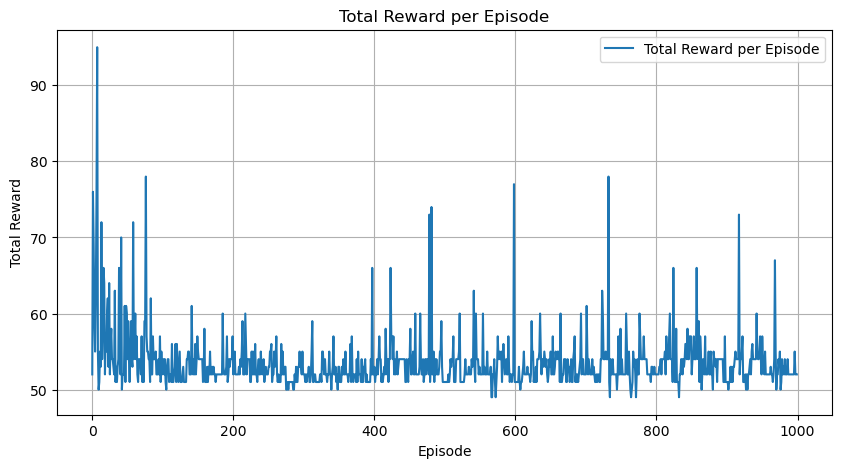

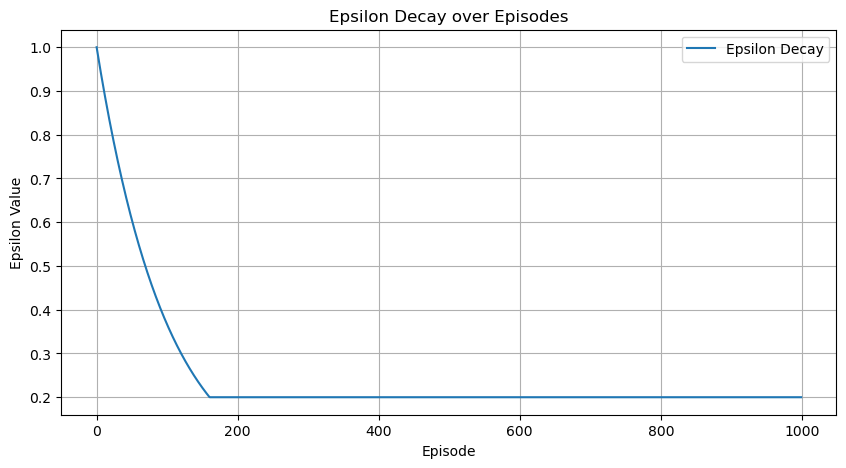

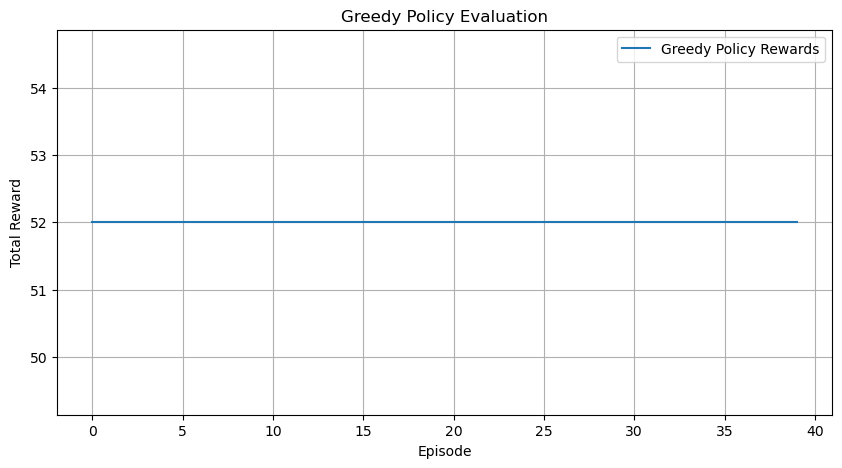

In [5]:
print("Trained Q-table:")
for state, actions in agent.Q.items():
    print(f"{state}: {actions}")

plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode_sars, label="Total Reward per Episode")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values_sars, label="Epsilon Decay")
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay over Episodes')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(evaluation_rewards_sars, label="Greedy Policy Rewards")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Greedy Policy Evaluation')
plt.legend()
plt.grid()
plt.show()

In [6]:
class NStepDoubleQLearningAgent:
    def __init__(self, env, alpha, gamma, epsilon, epsilon_decay, min_epsilon, n):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.n = n  # n-step parameter
        self.Q1 = {state: {action: 0 for action in env.action_space} for state in env.state_space}
        self.Q2 = {state: {action: 0 for action in env.action_space} for state in env.state_space}
        
        print("Initial Q1 Table:")
        for state, actions in self.Q1.items():
            print(f"{state}: {actions}")

        print("Initial Q2 Table:")
        for state, actions in self.Q2.items():
            print(f"{state}: {actions}")
        
    def epsilon_greedy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            return max(self.env.action_space, key=lambda action: self.Q1[state][action] + self.Q2[state][action])

    def train(self, episodes):
        rewards_per_episode = []
        epsilon_values = []

        for episode in range(episodes):
            state = self.env.reset()
            done = False
            episode_memory = deque(maxlen=self.n)
            total_reward = 0
            t = 0 

            while not done:
                action = self.epsilon_greedy(state)
                next_state, reward, done = self.env.step(action)

                episode_memory.append((state, action, reward, next_state, done))

                total_reward += reward

                if len(episode_memory) >= self.n:
                    G = 0
                    for i in range(len(episode_memory)):
                        _, _, r, _, _ = episode_memory[i]
                        G += r * (self.gamma ** i)

                    state_n, action_n, _, next_state_n, done_n = episode_memory[-1]

                    if random.random() < 0.5:
                        best_next_action = max(self.Q1[next_state_n], key=self.Q1[next_state_n].get)
                        td_target = G + self.gamma ** self.n * self.Q2[next_state_n][best_next_action]
                        td_error = td_target - self.Q1[state_n][action_n]
                        self.Q1[state_n][action_n] += self.alpha * td_error
                    else:
                        best_next_action = max(self.Q2[next_state_n], key=self.Q2[next_state_n].get)
                        td_target = G + self.gamma ** self.n * self.Q1[next_state_n][best_next_action]
                        td_error = td_target - self.Q2[state_n][action_n]
                        self.Q2[state_n][action_n] += self.alpha * td_error

                state = next_state
                t += 1

            rewards_per_episode.append(total_reward)
            epsilon_values.append(self.epsilon)

            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, epsilon_values


    def evaluate(self, episodes, max_steps=10000):
        print('Start evaluation')
        rewards = []
        comments = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            success = False
            steps = 0

            while steps < max_steps:
                steps += 1
                q_sum = {action: self.Q1[state][action] + self.Q2[state][action] for action in self.env.action_space}
                action = max(q_sum, key=q_sum.get)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                state = next_state

                if done:
                    success = True
                    break

            rewards.append(total_reward)
            if success:
                comments.append(f"Episode {episode + 1}: SUCCESS - Goal reached in {steps} steps with total reward {total_reward}.")
            else:
                comments.append(f"Episode {episode + 1}: FAIL - Goal not reached in {steps} steps (max steps reached).")

        for comment in comments:
            print(comment)

        return rewards, comments


env = TreasureHuntEnv()
agent = NStepDoubleQLearningAgent(env, alpha=0.5, gamma=0.9, epsilon=0.5, epsilon_decay=0.99, min_epsilon=0.1, n=4)
rewards_per_episode, epsilon_values = agent.train(1000)


Initial Q1 Table:
(0, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(0, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(0, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(0, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(0, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(1, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(1, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(1, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(1, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(1, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(2, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(2, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(2, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(2, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(2, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(3, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(3, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(3, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
(3, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right

Start evaluation
Episode 1: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 2: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 3: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 4: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 5: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 6: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 7: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 8: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 9: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 10: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 11: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 12: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 13: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 14: SUCCESS - Goal reached in 8 steps with total reward 54.
Episode 15: SUCCESS - Goal reached in 8 

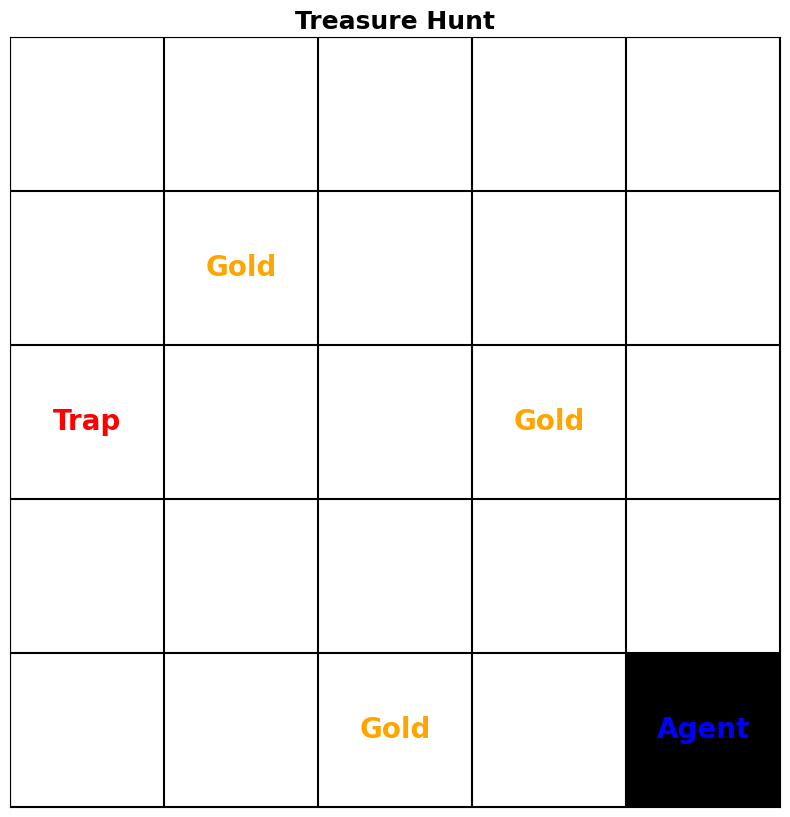

In [7]:
evaluation_episodes = 50
evaluation_rewards, evaluation_comments = agent.evaluate(evaluation_episodes)
env.render()

Trained Q1 Table:
(0, 0): {'Up': 1.5153232023558991, 'Down': 0.8281391737001901, 'Left': 0.25359977990295846, 'Right': 4.5992598504429925}
(0, 1): {'Up': 3.874187876135549, 'Down': 6.088844627819753, 'Left': 2.810645011948566, 'Right': 3.1931959447560088}
(0, 2): {'Up': 2.021167403500642, 'Down': 6.257256632242759, 'Left': 2.653833060887469, 'Right': 1.7474624416218405}
(0, 3): {'Up': 1.2984253633798872, 'Down': 7.0017855033219725, 'Left': 0.6428787466992012, 'Right': 0.8908523979209013}
(0, 4): {'Up': 0.0, 'Down': 2.3156998955734553, 'Left': 0.9324745673674371, 'Right': 0.0}
(1, 0): {'Up': 3.208295708142362, 'Down': -0.0733511364945118, 'Left': 2.2588375045269062, 'Right': 6.793734746853931}
(1, 1): {'Up': 5.631595446989913, 'Down': 7.730570815806084, 'Left': 4.276055004159442, 'Right': 6.2593806087729}
(1, 2): {'Up': 3.3030028074971187, 'Down': 4.216606974616733, 'Left': 5.129031653960933, 'Right': 9.128820441480535}
(1, 3): {'Up': 3.1696277000633475, 'Down': 13.113893766413685, 'Lef

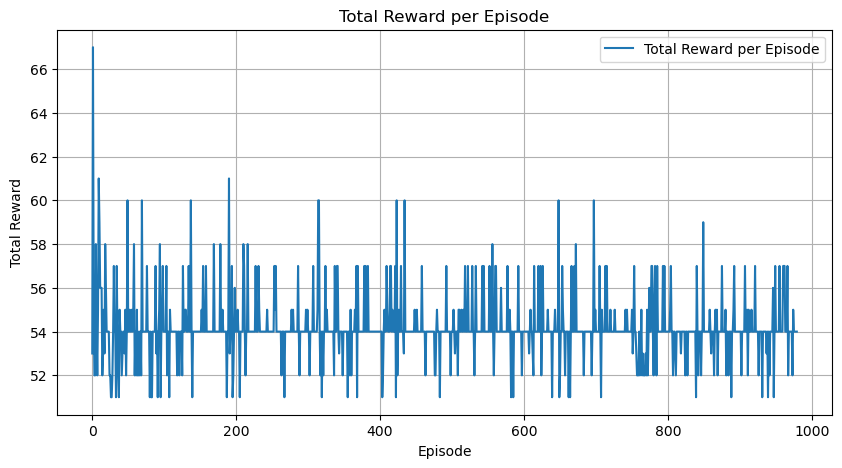

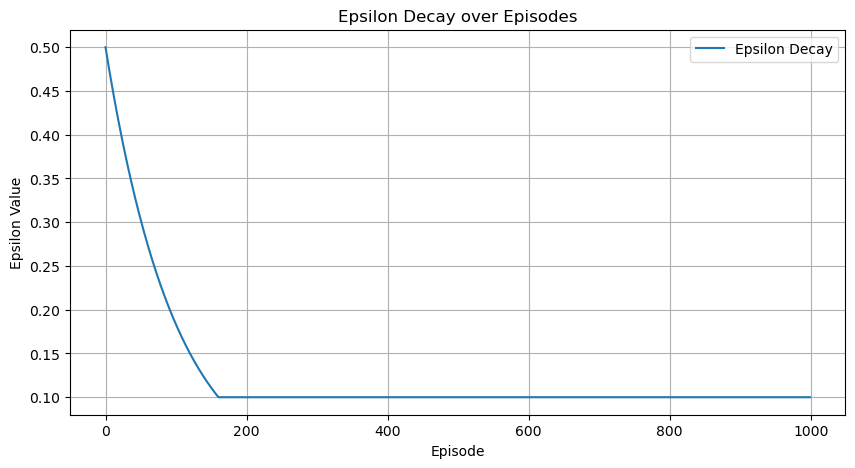

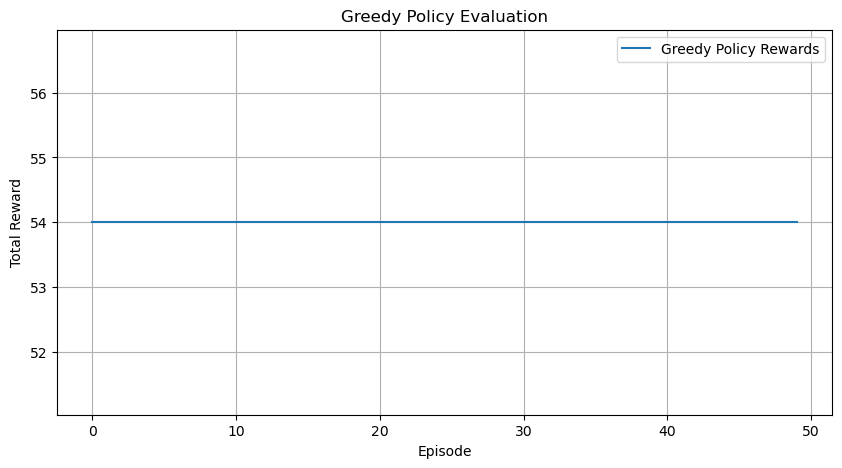

In [8]:
print("Trained Q1 Table:")
for state, actions in agent.Q1.items():
    print(f"{state}: {actions}")

print("\nTrained Q2 Table:")
for state, actions in agent.Q2.items():
    print(f"{state}: {actions}")

plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode[20:], label="Total Reward per Episode")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, label="Epsilon Decay")
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay over Episodes')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(evaluation_rewards, label="Greedy Policy Rewards")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Greedy Policy Evaluation')
plt.legend()
plt.grid()
plt.show()


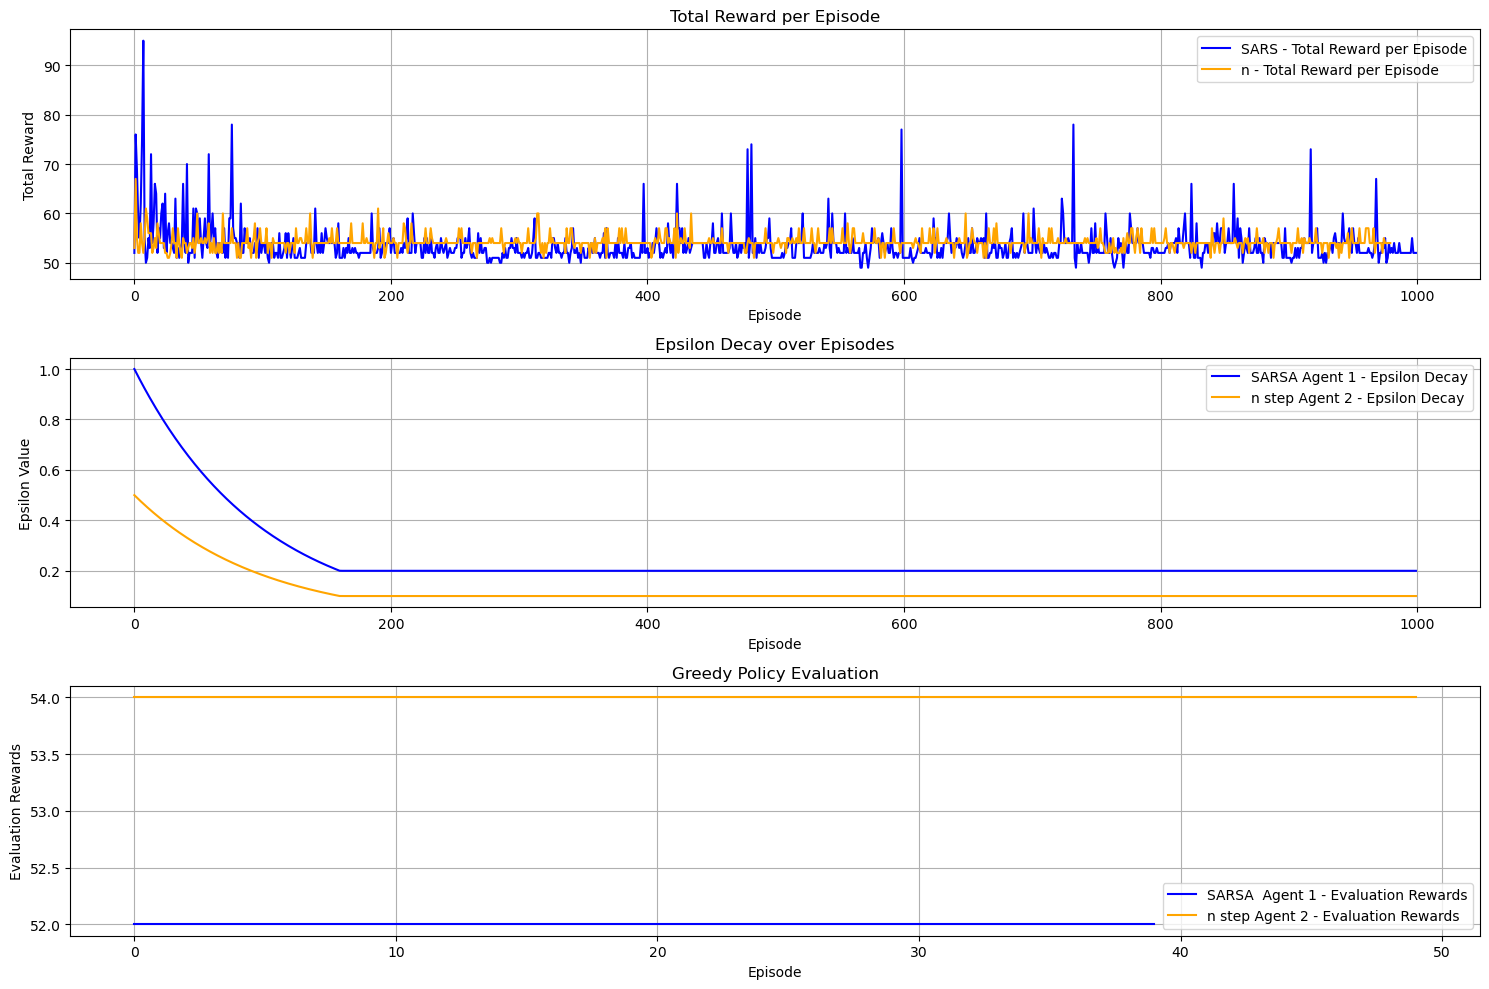

Trained Q1 Table:
(0, 0): {'Up': 1.5153232023558991, 'Down': 0.8281391737001901, 'Left': 0.25359977990295846, 'Right': 4.5992598504429925}
(0, 1): {'Up': 3.874187876135549, 'Down': 6.088844627819753, 'Left': 2.810645011948566, 'Right': 3.1931959447560088}
(0, 2): {'Up': 2.021167403500642, 'Down': 6.257256632242759, 'Left': 2.653833060887469, 'Right': 1.7474624416218405}
(0, 3): {'Up': 1.2984253633798872, 'Down': 7.0017855033219725, 'Left': 0.6428787466992012, 'Right': 0.8908523979209013}
(0, 4): {'Up': 0.0, 'Down': 2.3156998955734553, 'Left': 0.9324745673674371, 'Right': 0.0}
(1, 0): {'Up': 3.208295708142362, 'Down': -0.0733511364945118, 'Left': 2.2588375045269062, 'Right': 6.793734746853931}
(1, 1): {'Up': 5.631595446989913, 'Down': 7.730570815806084, 'Left': 4.276055004159442, 'Right': 6.2593806087729}
(1, 2): {'Up': 3.3030028074971187, 'Down': 4.216606974616733, 'Left': 5.129031653960933, 'Right': 9.128820441480535}
(1, 3): {'Up': 3.1696277000633475, 'Down': 13.113893766413685, 'Lef

In [9]:
import matplotlib.pyplot as plt

# Combine rewards, epsilon decay, and evaluations of both agents
plt.figure(figsize=(15, 10))

# Subplot 1: Total Rewards
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st plot
plt.plot(rewards_per_episode_sars, label="SARS - Total Reward per Episode", color="blue")
plt.plot(rewards_per_episode[20:], label="n - Total Reward per Episode", color="orange")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.grid()

# Subplot 2: Epsilon Decay
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd plot
plt.plot(epsilon_values_sars, label="SARSA Agent 1 - Epsilon Decay", color="blue")
plt.plot(epsilon_values, label="n step Agent 2 - Epsilon Decay", color="orange")
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay over Episodes')
plt.legend()
plt.grid()

# Subplot 3: Evaluation Rewards
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd plot
plt.plot(evaluation_rewards_sars, label="SARSA  Agent 1 - Evaluation Rewards", color="blue")
plt.plot(evaluation_rewards, label="n step Agent 2 - Evaluation Rewards", color="orange")
plt.xlabel('Episode')
plt.ylabel('Evaluation Rewards')
plt.title('Greedy Policy Evaluation')
plt.legend()
plt.grid()

# Adjust layout and show combined plots
plt.tight_layout()
plt.show()

# Print Q-tables for both agents
print("Trained Q1 Table:")
for state, actions in agent.Q1.items():
    print(f"{state}: {actions}")

print("\nTrained Q2 Table:")
for state, actions in agent.Q2.items():
    print(f"{state}: {actions}")


# Refrences: 

https://www.restack.io/p/reinforcement-learning-answer-gridworld-example-python-cat-ai

https://ubuffalo-my.sharepoint.com/personal/avereshc_buffalo_edu/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Favereshc%5Fbuffalo%5Fedu%2FDocuments%2F2024%5FFall%5FRL%2F%5Fpublic%2FCourse%20Materials%2FRL%20Environment%20Demo

https://www.supplychaindataanalytics.com/visualizing-2d-grids-and-arrays-using-matplotlib-in-python/

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/
https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

https://www.datacamp.com/tutorial/sarsa-reinforcement-learning-algorithm-in-python

https://advancedoracademy.medium.com/what-is-sarsa-an-introduction-8f495daf2418

https://www.youtube.com/watch?v=FhSaHuC0u2M&t=1s

https://builtin.com/machine-learning/sarsa

https://rubikscode.net/2020/01/20/double-q-learning-python/

https://www.kaggle.com/code/nitramj/double-q-learning-implementation

https://www.youtube.com/watch?v=XD0g2iBC80k

https://arxiv.org/abs/2407.02369

https://stackoverflow.com/questions/49822078/why-is-there-no-n-step-q-learning-algorithm-in-suttons-rl-book

http://incompleteideas.net/book/the-book-2nd.html
